In [2]:
import statsmodels.api as sm
import pandas as pd
from sklearn import datasets
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns= ["MEDV"])

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Simple

In [11]:
X =  df["RM"]
y = target["MEDV"]
X.shape, y.shape

((506,), (506,))

In [12]:
model = sm.OLS(y, X).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          3.74e-256
Time:                        10:36:57   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
prediction = model.predict(X)

<function matplotlib.pyplot.show(*args, **kw)>

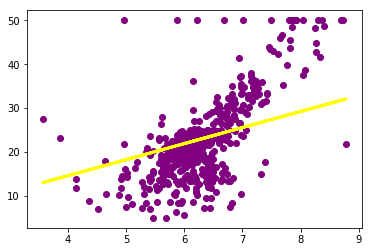

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color ="purple")
plt.plot(X, prediction, color ="yellow", linewidth = 3)
plt.show

In [20]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
prediction = model.predict(X)

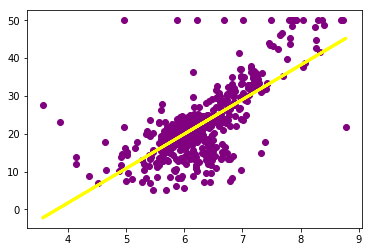

In [26]:
plt.scatter(X["RM"],y, color ="purple")
plt.plot(X["RM"], prediction, color="yellow", linewidth = 3)
plt.show()

# MULTIPLE

In [33]:
X = df[["RM", "CRIM"]]
Y = target["MEDV"]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           1.58e-09
Time:                        11:04:16   Log-Likelihood:                -2312.7
No. Observations:                 506   AIC:                             4629.
Df Residuals:                     504   BIC:                             4638.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.8899      1.067      5.519      0.000       3.793       7.987
x2            -2.2764      1.067     -2.133      0.033      -4.373      -0.180
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         1.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: x and y must be the same size

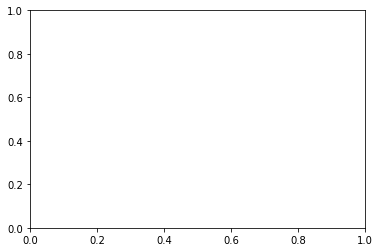

In [35]:
plt.scatter(X,y, color ="purple")
plt.plot(X, predictions, color ="yellow", linewidth = 3)
plt.show